<a href="https://colab.research.google.com/github/harry84523/maingit/blob/master/R_%E9%AE%91%E9%AD%9A%E6%95%B8%E6%93%9A%E9%9B%86(%E9%A0%90%E6%B8%AC%E5%B9%B4%E9%BD%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#匯入資料集

In [ ]:
abalone<-read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

# 引入這次所需的套件

In [ ]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('corrplot')
install.packages('ggplot2')
install.packages('caret')
install.packages("factoextra")
install.packages('fpc')
install.packages('NbClust')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dende

In [ ]:
library('NbClust')
library('corrplot')
library('ggplot2')
library('caret')
library("factoextra")
library('cluster')
library('fpc')
library('rpart')

corrplot 0.92 loaded

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



#觀察資料

In [ ]:
head(abalone)

,M,X0.455,X0.365,X0.095,X0.514,X0.2245,X0.101,X0.15,X15
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


##為方為方便觀察資料，先把columns改名

In [ ]:
names(abalone)
#'M''X0.455''X0.365''X0.095''X0.514''X0.2245''X0.101''X0.15''X15'
#性別/標稱/ -- / M、F和I（嬰兒）
#長度/連續/毫米/最長殼測量
#直徑/連續/毫米/垂直於長度
#高度/連續/毫米/帶殼肉
#整重/連續/克/整隻鮑魚
#去殼重量/連續/克/重量肉
#內臟重量/連續/克/腸重（出血後）
#殼重/連續/克/乾燥後
#Rings / integer / -- / +1.5 以年為單位給出年齡

[1] "M"       "X0.455"  "X0.365"  "X0.095"  "X0.514"  "X0.2245" "X0.101" 
[8] "X0.15"   "X15"

In [ ]:
colnames(abalone) <- c("Sex", "Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings") 

In [ ]:
head(abalone)
#性別/標稱/ -- / M、F和I（嬰兒）
#長度/連續/毫米/最長殼測量
#直徑/連續/毫米/垂直於長度
#高度/連續/毫米/帶殼肉
#整重/連續/克/整隻鮑魚
#去殼重量/連續/克/重量肉
#內臟重量/連續/克/腸重（出血後）
#殼重/連續/克/乾燥後
#Rings / integer / -- / +1.5 以年為單位給出年齡

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [ ]:
summary(abalone)

     Sex                Length         Diameter          Height      
 Length:4176        Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 Class :character   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.545   Median :0.4250   Median :0.1400  
                    Mean   :0.524   Mean   :0.4079   Mean   :0.1395  
                    3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
  WholeWeight     ShuckedWeight    VisceraWeight      ShellWeight    
 Min.   :0.0020   Min.   :0.0010   Min.   :0.00050   Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.09337   1st Qu.:0.1300  
 Median :0.7997   Median :0.3360   Median :0.17100   Median :0.2340  
 Mean   :0.8288   Mean   :0.3594   Mean   :0.18061   Mean   :0.2389  
 3rd Qu.:1.1533   3rd Qu.:0.5020   3rd Qu.:0.25300   3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :1.4880   Max.   :0.76000   Max.   :1.0050  
     Rings       
 M

##雖然我已經在資料集上看到沒有缺失資料了，但保險起見還是觀察是否有缺失直

In [ ]:
sum(is.na(abalone))#沒有缺失直

[1] 0

##稍微看一下RINGS的分布狀況

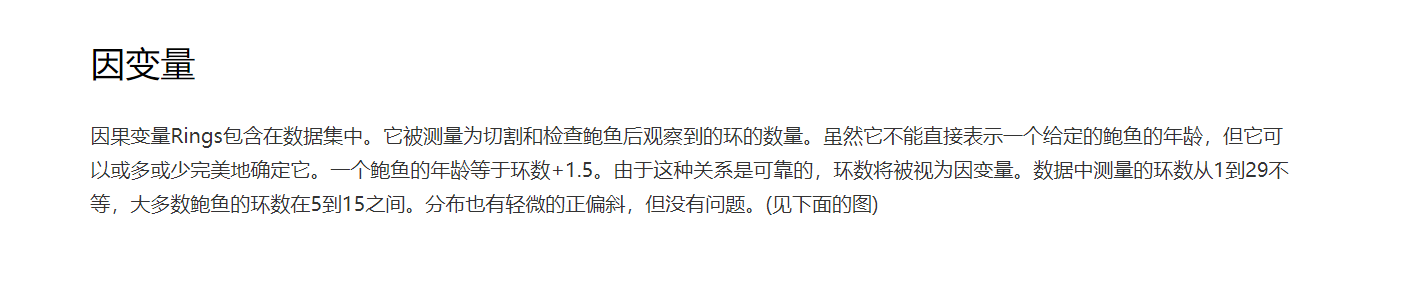

In [ ]:
table(abalone$Rings)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1  15  57 115 259 391 568 689 634 487 267 203 126 102  67  58  42  32  26 
 21  22  23  24  25  26  27  29 
 14   6   9   2   1   1   2   1 

#把性別改成數值以方便分析

In [ ]:
original_abalone=abalone

In [ ]:
abalone$Sex=ifelse(abalone$Sex == 'M',"1",abalone$Sex)
abalone$Sex=ifelse(abalone$Sex == 'F',"0",abalone$Sex)
abalone$Sex=ifelse(abalone$Sex == 'I',"2",abalone$Sex)

In [ ]:
abalone$Sex <- sapply(abalone$Sex,as.numeric)

In [ ]:
class(abalone$Sex)

[1] "numeric"

##取出另一個資料只觀察物理數值的屬性

In [ ]:
abalone_noage<-abalone[1:8]

In [ ]:
head(abalone_noage)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330


In [ ]:
summary(abalone_noage)

      Sex            Length         Diameter          Height      
 Min.   :0.000   Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Median :1.000   Median :0.545   Median :0.4250   Median :0.1400  
 Mean   :1.008   Mean   :0.524   Mean   :0.4079   Mean   :0.1395  
 3rd Qu.:2.000   3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
 Max.   :2.000   Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
  WholeWeight     ShuckedWeight    VisceraWeight      ShellWeight    
 Min.   :0.0020   Min.   :0.0010   Min.   :0.00050   Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.09337   1st Qu.:0.1300  
 Median :0.7997   Median :0.3360   Median :0.17100   Median :0.2340  
 Mean   :0.8288   Mean   :0.3594   Mean   :0.18061   Mean   :0.2389  
 3rd Qu.:1.1533   3rd Qu.:0.5020   3rd Qu.:0.25300   3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :1.4880   Max.   :0.76000   Max.   :1.0050  

##以年齡為群組下去看各資料的mean值

In [ ]:
attach(abalone)
aggregate(abalone, by=list(Rings), FUN=mean)

Group.1,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.0000000,0.0750000,0.0550000,0.01000000,0.00200000,0.00100000,0.000500000,0.001500000,1
2,2.0000000,0.1500000,0.1000000,0.02500000,0.01500000,0.00450000,0.004000000,0.005000000,2
3,1.8000000,0.1760000,0.1286667,0.04166667,0.02840000,0.01176667,0.006266667,0.008933333,3
4,1.8947368,0.2214912,0.1615789,0.05394737,0.05960526,0.02471930,0.012956140,0.018000000,4
5,1.8347826,0.2857391,0.2106957,0.06991304,0.12550000,0.06169565,0.027330435,0.036769565,5
6,1.7722008,0.3693629,0.2788610,0.09177606,0.27317375,0.12315830,0.058370656,0.078388031,6
7,1.5703325,0.4220332,0.3215345,0.10592072,0.39738619,0.18265729,0.085898977,0.111648338,7
8,1.2676056,0.4987764,0.3847975,0.12855634,0.64075264,0.29377289,0.138501761,0.178609155,8
9,0.9056604,0.5468650,0.4252177,0.14272134,0.85201306,0.38793759,0.187802612,0.236509434,9


#變數均一化

In [ ]:
abalone_z <- as.data.frame(lapply(abalone[2:8], scale)) #變數均一化
summary(abalone_z)

     Length           Diameter           Height          WholeWeight      
 Min.   :-3.7385   Min.   :-3.5556   Min.   :-3.33586   Min.   :-1.68592  
 1st Qu.:-0.6162   1st Qu.:-0.5833   1st Qu.:-0.58640   1st Qu.:-0.78976  
 Median : 0.1748   Median : 0.1724   Median : 0.01131   Median :-0.05927  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.7576   3rd Qu.: 0.7265   3rd Qu.: 0.60902   3rd Qu.: 0.66153  
 Max.   : 2.4229   Max.   : 2.4394   Max.   :23.68057   Max.   : 4.07134  
 ShuckedWeight     VisceraWeight       ShellWeight      
 Min.   :-1.6146   Min.   :-1.64306   Min.   :-1.70496  
 1st Qu.:-0.7812   1st Qu.:-0.79582   1st Qu.:-0.78191  
 Median :-0.1054   Median :-0.08769   Median :-0.03485  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6424   3rd Qu.: 0.66034   3rd Qu.: 0.64756  
 Max.   : 5.0842   Max.   : 5.28539   Max.   : 5.50344  

In [ ]:
head(abalone_z)

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.44883373,-1.43971988,-1.1841103,-1.2301969,-1.1708267,-1.2051826,-1.2129088
2,0.04988553,0.12200034,-0.1082345,-0.3095641,-0.4635549,-0.3568008,-0.2072524
3,-0.69947410,-0.43215844,-0.3473180,-0.6378518,-0.6482565,-0.6076664,-0.6023317
4,-1.61535809,-1.54047602,-1.4231938,-1.2719975,-1.2158759,-1.2872841,-1.3206577
5,-0.82436737,-1.08707338,-1.0645685,-0.9732761,-0.9838727,-0.9406335,-0.8537458
6,0.04988553,0.07162227,0.2503907,-0.1046392,-0.5514008,-0.3568008,0.6547389


##用kmeans下去分群

In [ ]:
pamk.best <- pamk(abalone_z)
pamk.best$nc

[1] 2

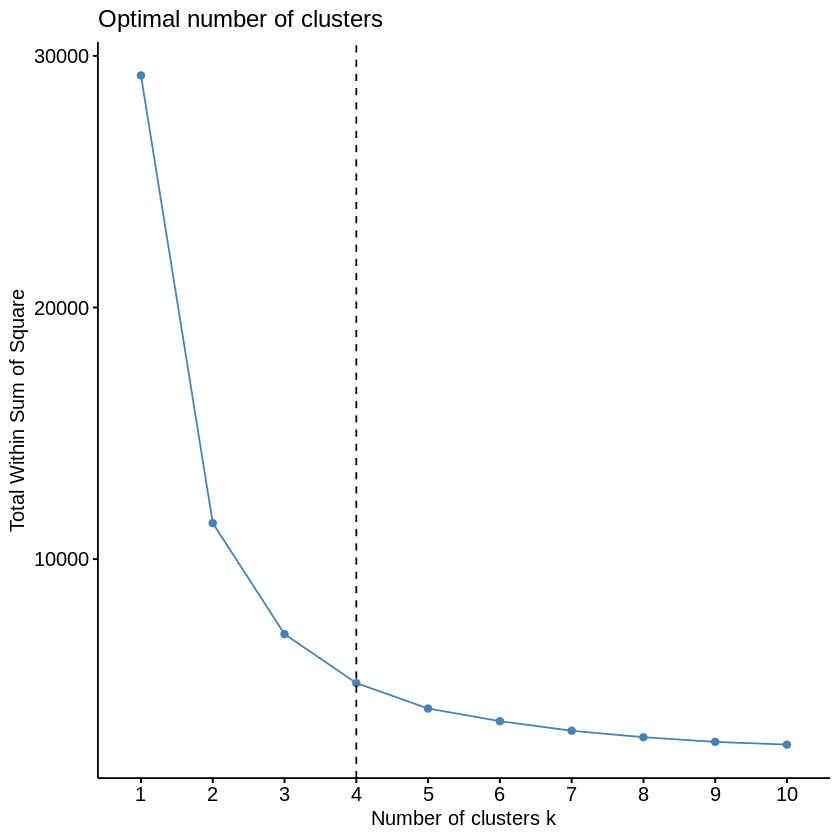

In [ ]:
fviz_nbclust(abalone_z,kmeans,method='wss')+ geom_vline(xintercept = 4, linetype = 2)

#利用nbclust顯示分群4類為佳

In [ ]:
abalone_cluster=kmeans(abalone_z, center=4)

In [ ]:
abalone_cluster$cluster

[1] 4 3 3 4 4 3 3 3 2 3 3 3 3 3 3 4 3 4 3 4 4 2 3 2 2 2 2 2 2 2 1 1 1 1 3 2 3
  [38] 2 4 3 2 4 4 4 4 3 3 4 2 3 4 3 3 4 3 3 3 4 3 3 3 3 4 3 3 2 2 3 4 3 4 2 2 2
  [75] 2 2 2 3 2 2 1 2 2 2 2 2 2 3 2 2 2 2 2 1 1 3 3 3 3 4 2 2 3 2 3 2 3 3 3 3 3
 [112] 4 3 3 3 3 3 2 4 3 4 3 4 4 4 4 4 1 1 2 3 4 4 4 3 4 4 4 4 2 3 1 2 3 3 3 4 4
 [149] 4 2 2 1 2 2 3 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 3 2 3 4 4 4 4 4 2 2 1 2 2 1 2
 [186] 2 1 2 2 2 2 2 4 3 3 3 2 2 2 3 2 3 2 3 3 4 3 2 4 3 4 3 3 3 3 3 4 3 3 3 3 3
 [223] 3 3 3 4 4 2 3 2 2 1 4 3 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 1 2
 [260] 2 2 2 4 4 3 2 4 3 3 1 2 2 1 2 1 1 1 1 3 2 4 3 3 2 2 3 3 3 2 2 2 2 2 2 4 4
 [297] 4 3 4 4 2 4 4 3 4 4 1 3 2 2 2 2 2 2 3 2 3 2 4 4 4 4 4 4 4 4 3 4 4 3 4 4 4
 [334] 1 2 2 2 2 2 2 1 2 3 3 3 3 4 4 2 2 2 2 2 2 1 1 1 1 1 2 2 1 2 2 2 2 2 2 1 1
 [371] 1 1 1 2 1 2 2 2 2 2 2 3 3 2 3 3 3 3 3 4 3 3 4 4 4 3 3 3 2 3 3 3 3 3 2 3 2
 [408] 2 3 2 2 2 3 2 2 2 1 2 3 1 3 3 4 4 2 2 2 2 2 2 2 2 3 3 3 4 4 4 3 4 4 3 4 4
 [445] 2 2 2 2 2 1 1 1 2 2 2 2 4 4 3 4 2 4 4 4 4 1 1 1 1 3 3 3 3 3 3 3 2 1 1 1 2
 [482] 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 4 4 4 4 4 4
 [519] 4 4 4 4 4 4 4 4 3 2 4 3 3 3 3 3 3 3 4 4 4 3 3 4 3 4 4 4 4 2 2 2 2 2 3 3 3
 [556] 3 2 1 3 3 3 3 3 3 4 3 3 4 3 3 3 2 2 2 2 2 2 2 1 2 2 1 3 4 3 3 2 3 4 3 4 2
 [593] 1 3 2 3 2 2 2 2 4 4 3 3 3 4 3 4 4 3 4 4 3 3 3 3 4 4 4 4 3 3 3 3 3 4 4 2 4
 [630] 3 3 3 3 4 4 4 4 3 3 4 2 2 4 3 3 4 3 3 3 4 4 3 4 4 4 2 2 2 2 1 2 3 4 3 4 3
 [667] 3 2 3 3 3 3 3 3 3 3 3 3 4 4 3 3 2 3 2 3 3 3 2 3 4 3 4 4 4 4 4 3 4 4 3 3 4
 [704] 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 [741] 4 3 3 3 2 1 3 3 1 3 3 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 4 2 2 2 3 4 3 3 3 3 3
 [778] 3 3 2 3 2 4 4 2 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3 3 3 4 3 4 4 3 3 3 3 3 4 4 4
 [815] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 2
 [852] 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1
 [889] 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 3
 [926] 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [963] 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1000] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 2 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1
[1037] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1074] 4 4 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1111] 3 2 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
[1148] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 2 1 2 1 1 1 2 2
[1185] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4
[1222] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4
[1259] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1296] 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 2 3 2 3 3 2 2 3 2 2 3 2 2 2 2 2 3 2 2 2 2 3
[1333] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1370] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1
[1407] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3
[1444] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2
[1481] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1
[1518] 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1555] 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
[1592] 3 3 3 3 3 3 3 3 3 2 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 2 2 2 3 2 2 2 2
[1629] 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1666] 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2
[1703] 2 2 1 2 2 1 1 2 2 2 1 1 2 1 2 2 1 1 1 2 1 1 2 1 1 1 1 2 2 1 2 2 1 1 1 1 2
[1740] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 3 3 3 3 3 3 3 3 3 3 2
[1777] 3 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1
[1814] 1 1 1 1 1 1 1 1 1 1 4 4 4 4

##在用繪圖觀察資料分布

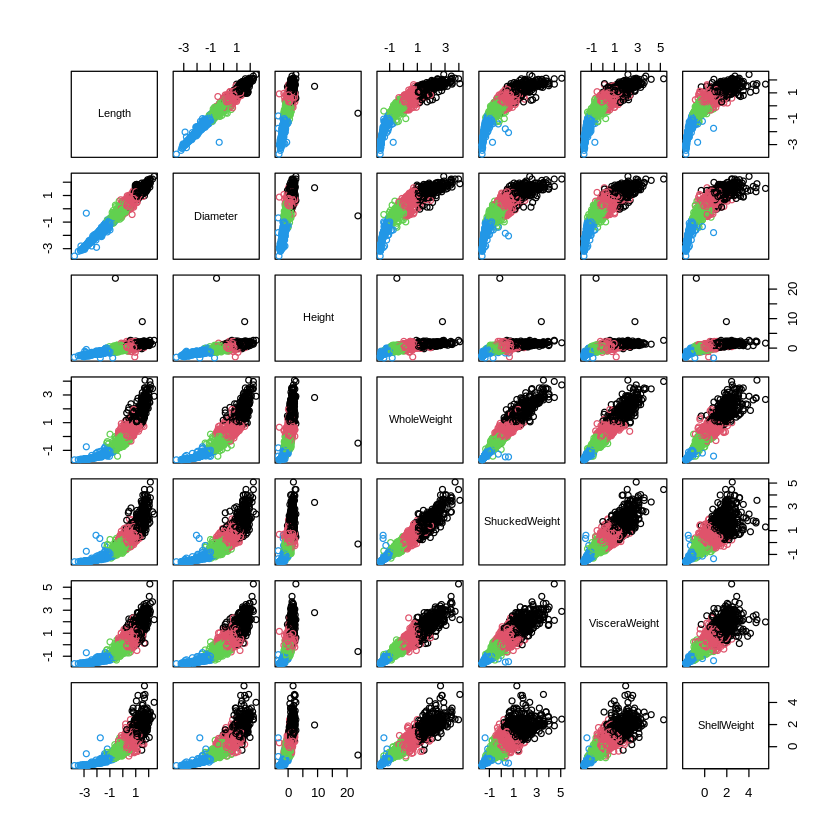

In [ ]:
plot(abalone_z, col = abalone_cluster$cluster)

In [ ]:
head(abalone_z)

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.44883373,-1.43971988,-1.1841103,-1.2301969,-1.1708267,-1.2051826,-1.2129088
2,0.04988553,0.12200034,-0.1082345,-0.3095641,-0.4635549,-0.3568008,-0.2072524
3,-0.69947410,-0.43215844,-0.3473180,-0.6378518,-0.6482565,-0.6076664,-0.6023317
4,-1.61535809,-1.54047602,-1.4231938,-1.2719975,-1.2158759,-1.2872841,-1.3206577
5,-0.82436737,-1.08707338,-1.0645685,-0.9732761,-0.9838727,-0.9406335,-0.8537458
6,0.04988553,0.07162227,0.2503907,-0.1046392,-0.5514008,-0.3568008,0.6547389


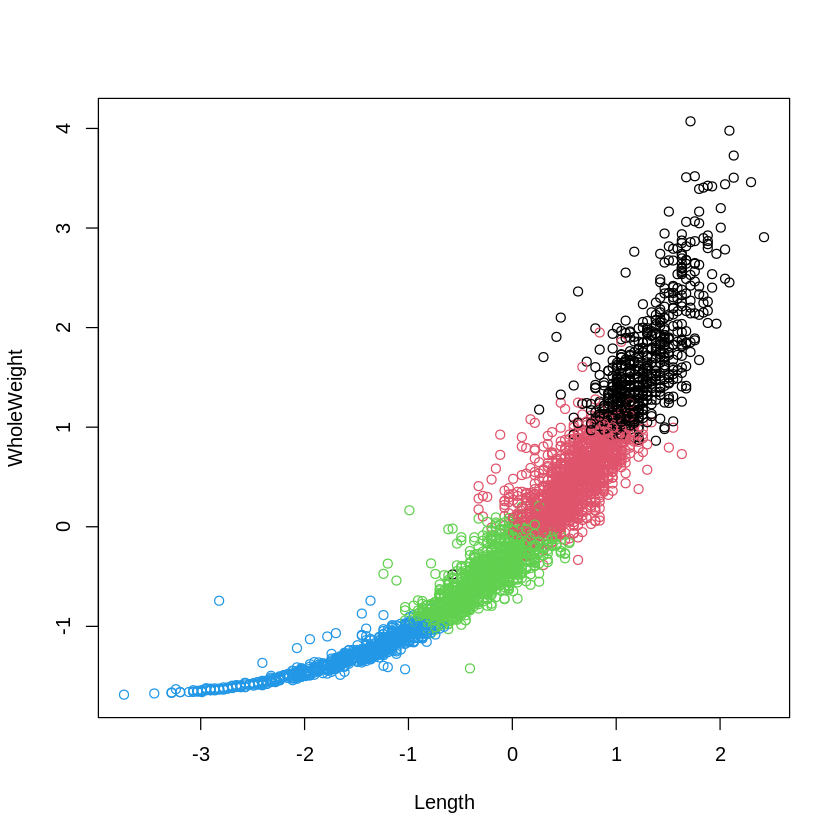

In [ ]:
plot(abalone_z[c("Length", "WholeWeight")], col = abalone_cluster$cluster)#長度與總重量的資料分布

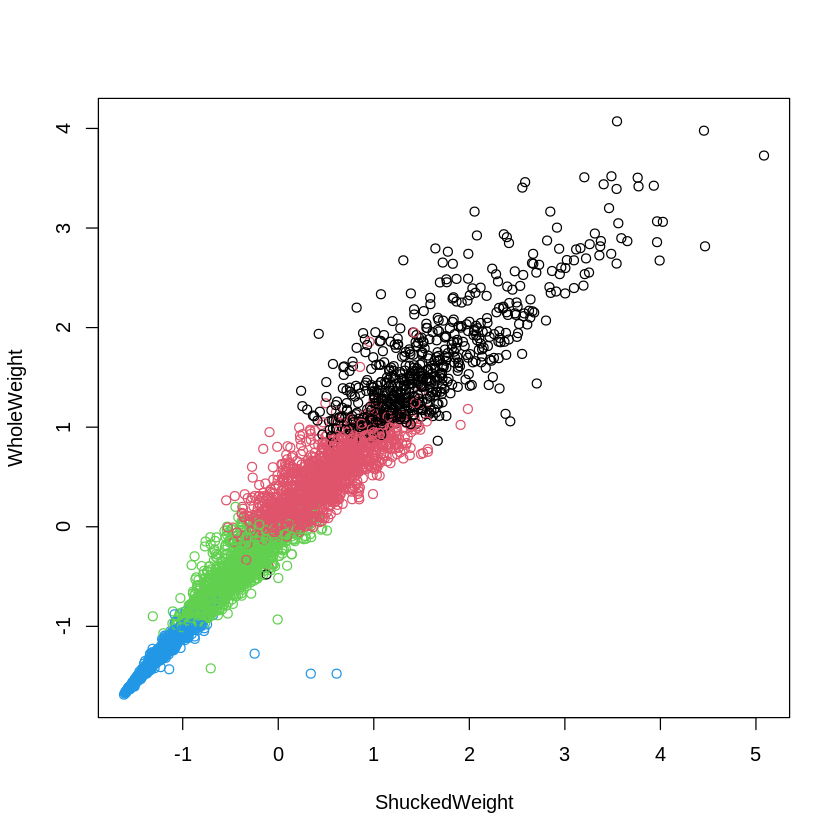

In [ ]:
plot(abalone_z[c("ShuckedWeight", "WholeWeight")], col = abalone_cluster$cluster)#去殼重與總重的資料分布

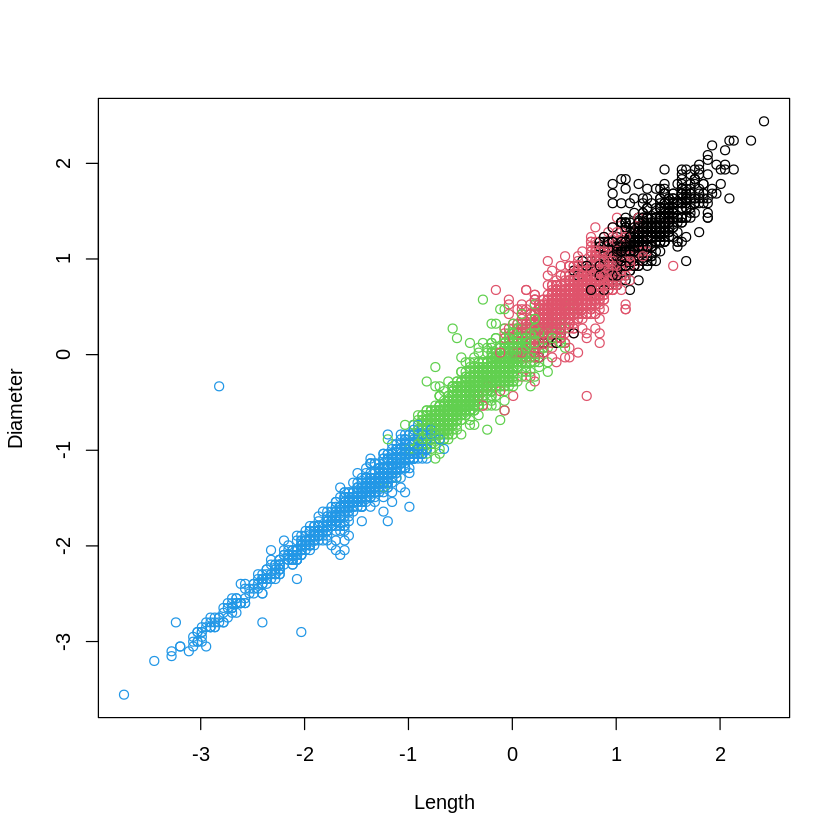

In [ ]:
plot(abalone_z[c("Length", "Diameter")], col = abalone_cluster$cluster)#長度與直徑的資料分布

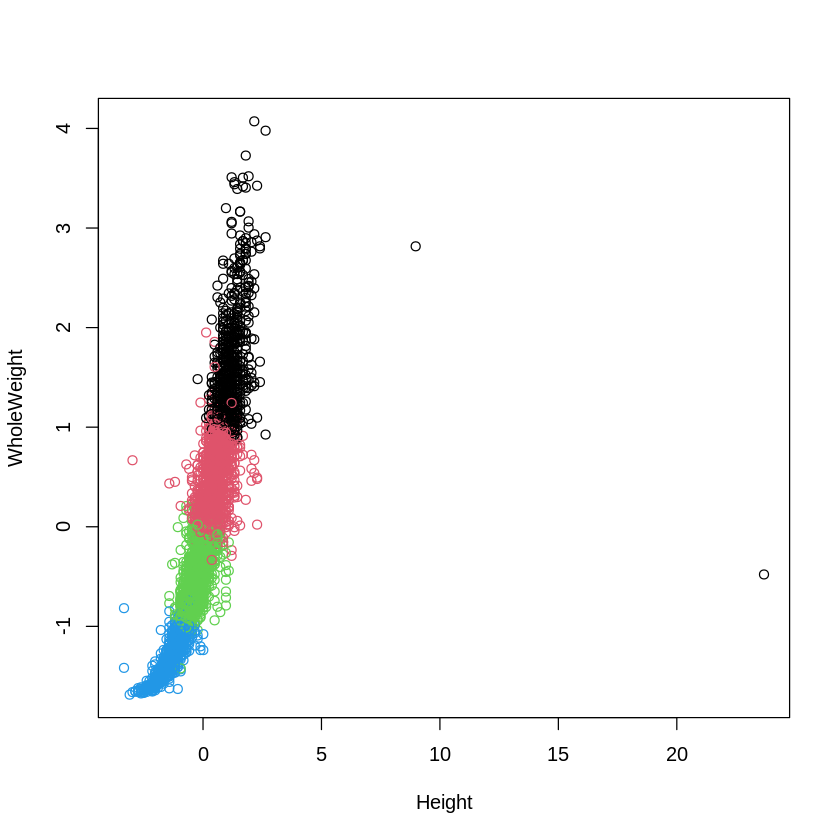

In [ ]:
plot(abalone_z[c("Height", "WholeWeight")], col = abalone_cluster$cluster)#高度與總重量的資料分布

In [ ]:
abalone_cluster$centers#看kmeans的centers

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
1,1.2581659,1.2585075,1.2329565,1.6420788,1.5887804,1.5996434,1.5799045
2,0.5781558,0.5810277,0.4654332,0.4492326,0.4368785,0.4428787,0.4395624
3,-0.2846788,-0.2883995,-0.2915751,-0.5111019,-0.5047430,-0.5001480,-0.4758151
4,-1.5762611,-1.5757094,-1.3433013,-1.2864685,-1.2322951,-1.2590217,-1.2764606


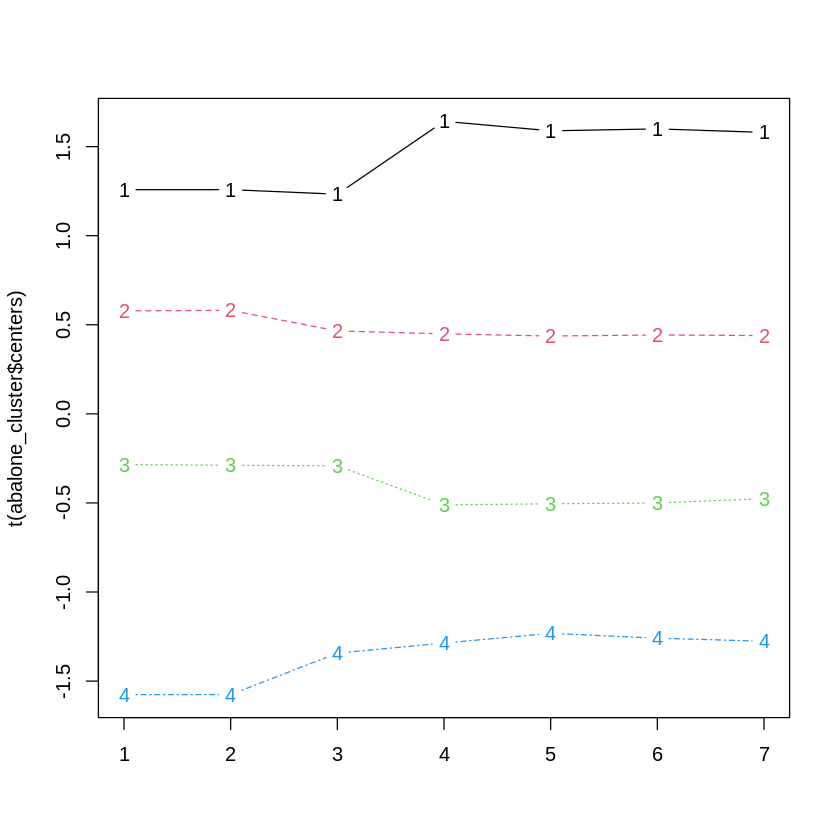

In [ ]:
matplot(t(abalone_cluster$centers), type='b')

In [ ]:
abalone['cluster']=abalone_cluster$cluster
head(abalone)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,4
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,3
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,3
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,4
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,4
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,3


#每個cluster比對各columns的均值

In [ ]:
agg_len=aggregate(data = abalone, Length ~ cluster, FUN = 'mean')
agg_len

cluster,Length
<int>,<dbl>
1,0.6751176
2,0.5934466
3,0.4898180
4,0.3346957


In [ ]:
agg_over=aggregate(data = abalone, WholeWeight ~ cluster, FUN = 'mean')
agg_over

cluster,WholeWeight
<int>,<dbl>
1,1.6341317
2,1.0491318
3,0.5781611
4,0.1979031


In [ ]:
agg_age=aggregate(data = abalone, Rings	 ~ cluster, FUN = 'mean')
agg_age

cluster,Rings
<int>,<dbl>
1,12.192790
2,10.989598
3,9.609605
4,6.765217


第一組為環數最多(也就是年齡較大的群),而第4組為環數最少的群集

#用TABLE觀察分群的狀況

In [ ]:
table(abalone$Rings,abalone_cluster$cluster)

    
       1   2   3   4
  1    0   0   0   1
  2    0   0   0   1
  3    0   0   0  15
  4    0   0   0  57
  5    0   0   2 113
  6    1   4  50 204
  7    1  19 175 196
  8   10 153 313  92
  9   61 321 255  52
  10 126 321 146  41
  11 165 204 102  16
  12  77 104  77   9
  13  52  88  59   4
  14  29  59  36   2
  15  23  50  28   1
  16  23  29  14   1
  17  19  30   9   0
  18  17  18   7   0
  19  10  16   6   0
  20   9  13   4   0
  21   6   6   2   0
  22   3   1   2   0
  23   1   4   4   0
  24   2   0   0   0
  25   1   0   0   0
  26   0   1   0   0
  27   1   1   0   0
  29   1   0   0   0

##直接用kmeans分析並無法很好的分群,因此將做進一步的分析

#離群值

In [ ]:
centers = abalone_cluster$centers[abalone_cluster$cluster, ]
head(centers)

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
4,-1.5762611,-1.5757094,-1.3433013,-1.2864685,-1.232295,-1.259022,-1.2764606
3,-0.2846788,-0.2883995,-0.2915751,-0.5111019,-0.504743,-0.500148,-0.4758151
3,-0.2846788,-0.2883995,-0.2915751,-0.5111019,-0.504743,-0.500148,-0.4758151
4,-1.5762611,-1.5757094,-1.3433013,-1.2864685,-1.232295,-1.259022,-1.2764606
4,-1.5762611,-1.5757094,-1.3433013,-1.2864685,-1.232295,-1.259022,-1.2764606
3,-0.2846788,-0.2883995,-0.2915751,-0.5111019,-0.504743,-0.500148,-0.4758151


In [ ]:
distances = sqrt(rowSums((abalone_noage-centers)^2)) #計算距離
head(distances)

[1] 4.823196 2.066259 2.260962 5.396320 5.529951 2.152572

In [ ]:
outliers = order(distances,decreasing=T)[1:30]
outliers

[1] 1257 3718  828 1258  924 1839 2008 1210 2511 2733 2632  930  831  920 2635
[16] 2509 3637 3111 2197 3410 3806 2876 3885 1254    5 2284  922 2510 3639  112

In [ ]:
abalone_noage[outliers, ]

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1257,2,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150
3718,2,0.360,0.250,0.115,0.4650,0.2100,0.1055,0.1280
828,2,0.410,0.325,0.100,0.3940,0.2080,0.0655,0.1060
1258,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045
924,2,0.425,0.315,0.100,0.3770,0.1645,0.0720,0.1050
1839,2,0.420,0.325,0.100,0.3680,0.1675,0.0625,0.1135
2008,2,0.425,0.315,0.095,0.3675,0.1865,0.0675,0.0985
1210,2,0.185,0.375,0.120,0.4645,0.1960,0.1045,0.1500
2511,2,0.425,0.310,0.105,0.3650,0.1590,0.0825,0.1050


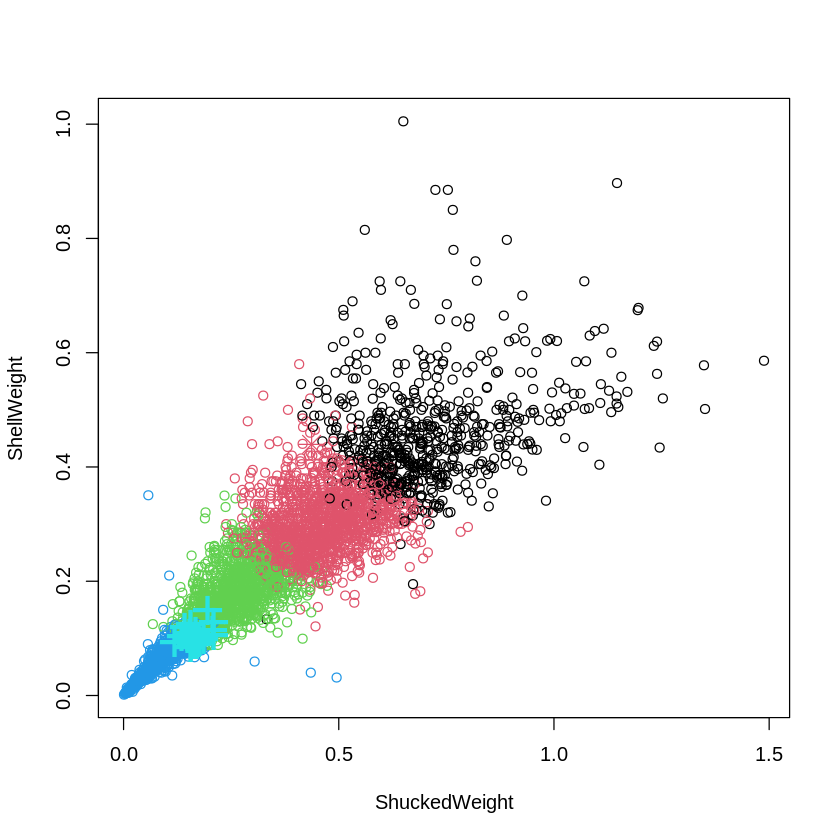

In [ ]:
plot(abalone_noage[c("ShuckedWeight", "ShellWeight")], col=abalone_cluster$cluster)
points(abalone_cluster$centers[,c("ShuckedWeight", "ShellWeight")], col=1:3, pch=8, cex=2)
points(abalone_noage[outliers,c("ShuckedWeight", "ShellWeight")], col=5, pch='+', cex=3)

###上圖可看出離可看出離群職大多分布在藍色以及綠色群之間

##觀察各屬性的相關性

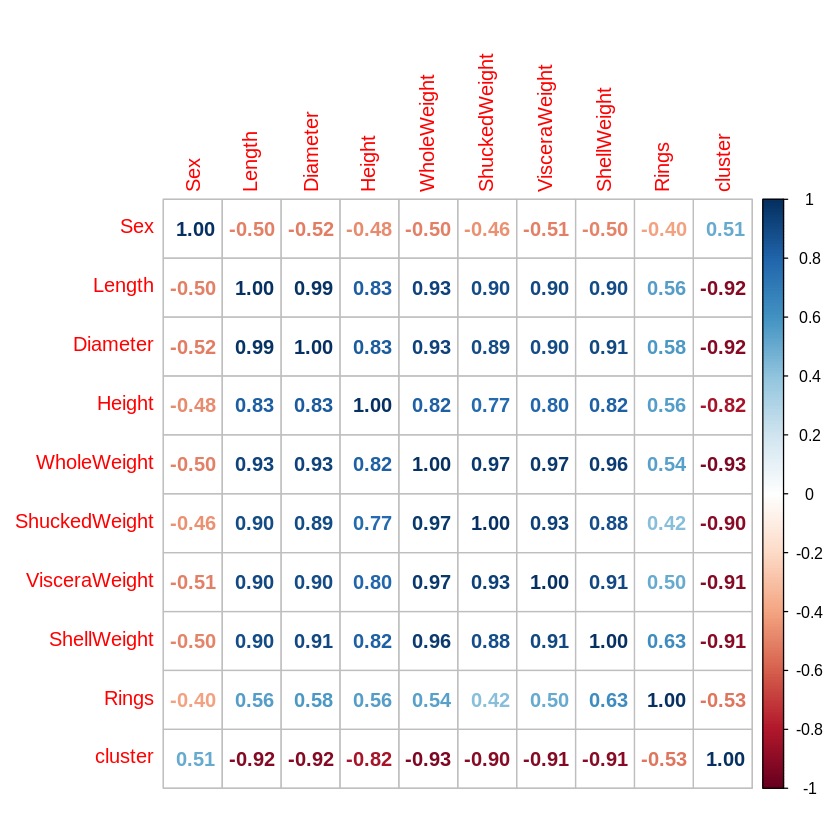

In [ ]:
M<-cor(abalone)
corrplot(M, method = "number")

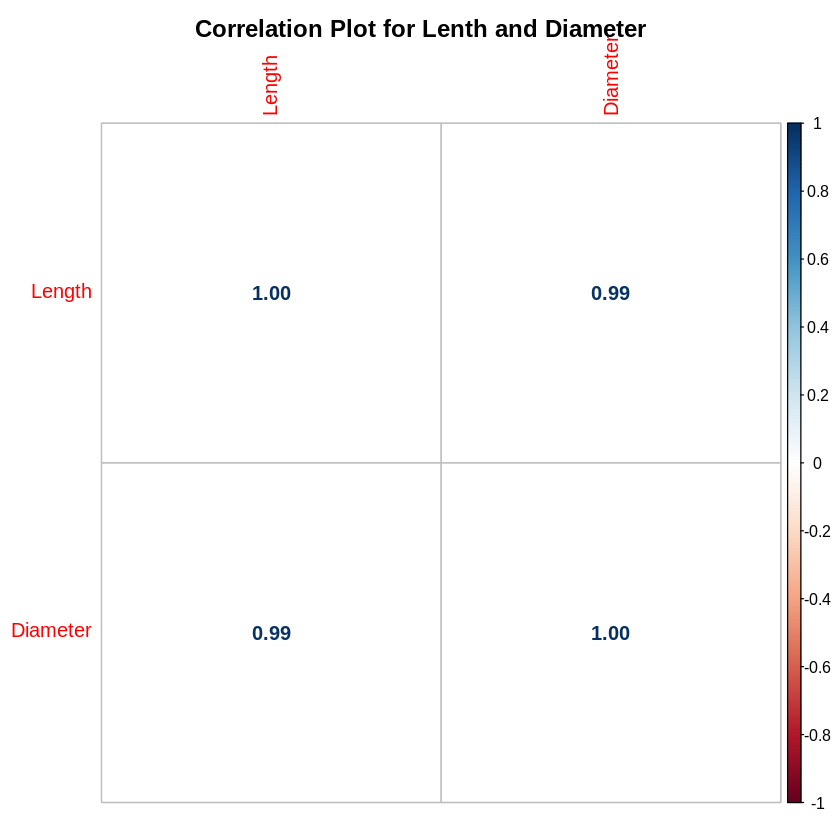

In [ ]:
corrplot(cor(abalone[2:3]), main="\n\nCorrelation Plot for Lenth and Diameter", method="number")#長度跟直徑相關性

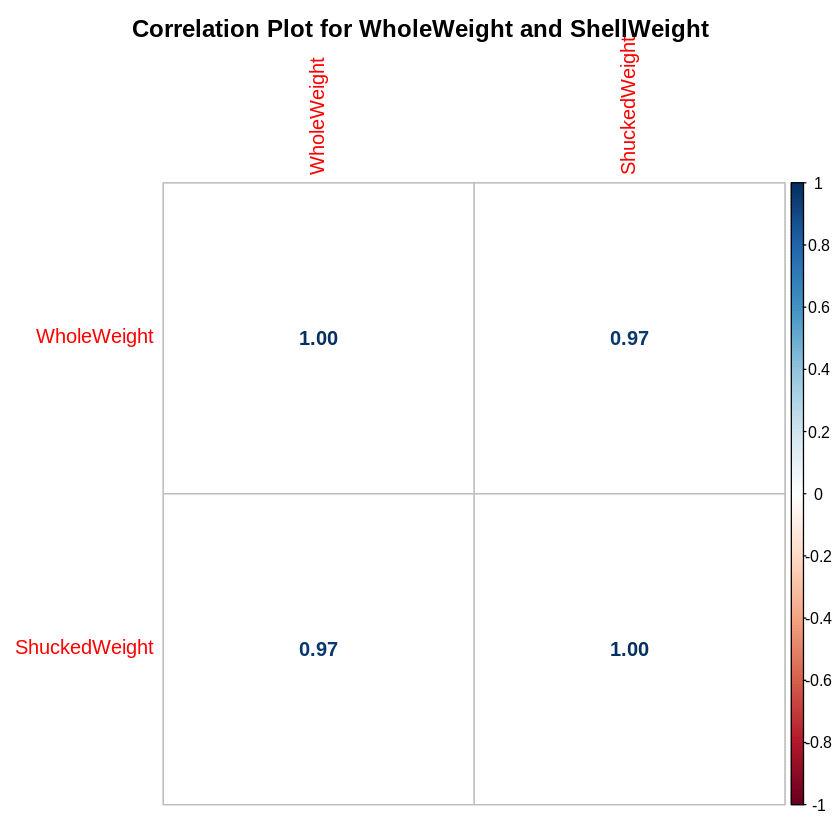

In [ ]:
corrplot(cor(abalone[5:6]), main="\n\nCorrelation Plot for WholeWeight and ShellWeight", method="number")#總重跟去殼重相關性

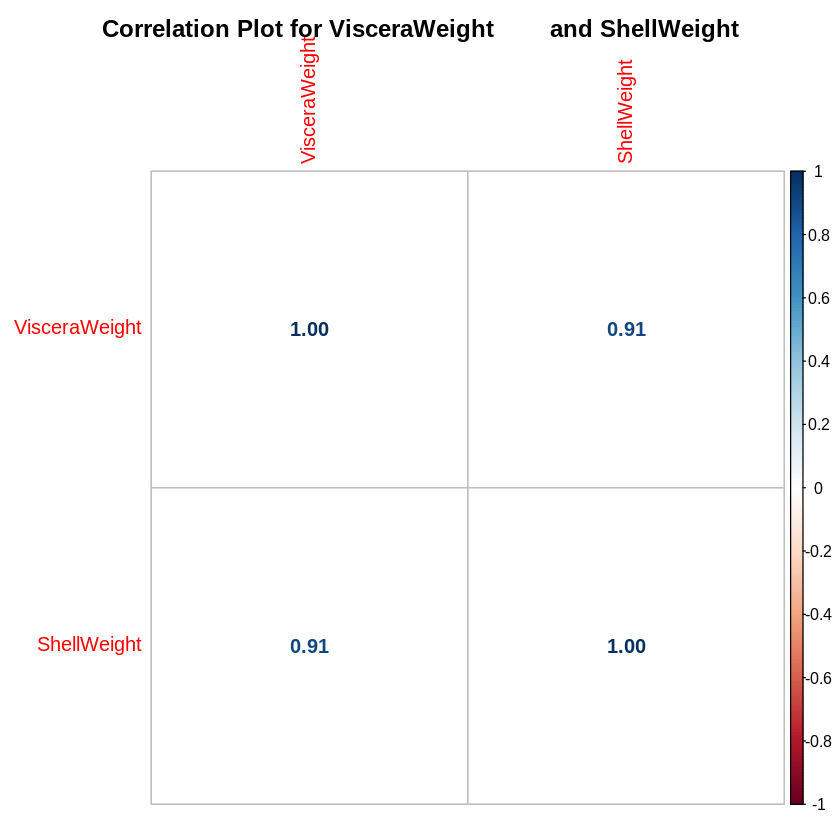

In [ ]:
corrplot(cor(abalone[7:8]), main="\n\nCorrelation Plot for VisceraWeight	and ShellWeight", method="number")#內臟重跟殼重相關性

In [ ]:
attach(abalone_z)
aggregate(abalone_z, by=list(Rings), FUN=mean)

The following objects are masked from abalone:

    Diameter, Height, Length, ShellWeight, ShuckedWeight,
    VisceraWeight, WholeWeight




Group.1,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-3.7385437,-3.5555989,-3.09677833,-1.68592543,-1.6145610,-1.64305712,-1.7049622
2,-3.1140774,-3.1021962,-2.73815307,-1.65941773,-1.5987938,-1.61112877,-1.6798208
3,-2.8975957,-2.8133620,-2.33968057,-1.63209441,-1.5660580,-1.59045136,-1.6515666
4,-2.5188258,-2.4817505,-2.04606924,-1.56846519,-1.5077075,-1.52942741,-1.5864384
5,-1.9838837,-1.9868695,-1.66435629,-1.43410228,-1.3411322,-1.39829956,-1.4516117
6,-1.2876137,-1.3000618,-1.14164759,-1.13298757,-1.0642481,-1.11513870,-1.1526554
7,-0.8490692,-0.8700998,-0.80347223,-0.87971171,-0.7962101,-0.86401476,-0.9137380
8,-0.2100889,-0.2326861,-0.26229185,-0.38347442,-0.2956437,-0.38415191,-0.4327410
9,0.1903074,0.1745719,0.07636987,0.04729694,0.1285604,0.06558945,-0.0168282


#訓練模型

###拿一部分資料作訓練集

In [ ]:
abalone_z$Rings=abalone$Rings

In [ ]:
head(abalone_z)

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1.44883373,-1.43971988,-1.1841103,-1.2301969,-1.1708267,-1.2051826,-1.2129088,7
2,0.04988553,0.12200034,-0.1082345,-0.3095641,-0.4635549,-0.3568008,-0.2072524,9
3,-0.69947410,-0.43215844,-0.3473180,-0.6378518,-0.6482565,-0.6076664,-0.6023317,10
4,-1.61535809,-1.54047602,-1.4231938,-1.2719975,-1.2158759,-1.2872841,-1.3206577,7
5,-0.82436737,-1.08707338,-1.0645685,-0.9732761,-0.9838727,-0.9406335,-0.8537458,8
6,0.04988553,0.07162227,0.2503907,-0.1046392,-0.5514008,-0.3568008,0.6547389,20


In [ ]:
intrain<- createDataPartition(abalone_z$Rings, p=0.7, list=FALSE)
set.seed(6)
training<- abalone_z[intrain, ]  # training dataset 訓練集
testing<- abalone_z[-intrain, ] 

In [ ]:
intrain

Resample1
1
2
3
4
5
6
7
8
9
10


In [ ]:
dim(training); dim(testing)

[1] 2925    8

[1] 1251    8

In [ ]:
training

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1.44883373,-1.43971988,-1.18411029,-1.2301969,-1.17082674,-1.20518263,-1.2129088,7
2,0.04988553,0.12200034,-0.10823452,-0.3095641,-0.46355490,-0.35680082,-0.2072524,9
3,-0.69947410,-0.43215844,-0.34731803,-0.6378518,-0.64825646,-0.60766641,-0.6023317,10
4,-1.61535809,-1.54047602,-1.42319380,-1.2719975,-1.21587590,-1.28728410,-1.3206577,7
5,-0.82436737,-1.08707338,-1.06456854,-0.9732761,-0.98387272,-0.94063346,-0.8537458,8
6,0.04988553,0.07162227,0.25039073,-0.1046392,-0.55140077,-0.35680082,0.6547389,20
7,0.17477880,0.17237842,-0.34731803,-0.1240102,-0.29462055,-0.28382174,0.1519106,16
8,-0.40805647,-0.38178037,-0.34731803,-0.6511056,-0.64375155,-0.62134998,-0.5304991,9
9,0.21640989,0.32351263,0.25039073,0.1339301,-0.20226976,-0.27013816,0.5829063,19


##回歸分析

In [ ]:
head(training)

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1.44883373,-1.43971988,-1.1841103,-1.2301969,-1.1708267,-1.2051826,-1.2129088,7
2,0.04988553,0.12200034,-0.1082345,-0.3095641,-0.4635549,-0.3568008,-0.2072524,9
3,-0.69947410,-0.43215844,-0.3473180,-0.6378518,-0.6482565,-0.6076664,-0.6023317,10
4,-1.61535809,-1.54047602,-1.4231938,-1.2719975,-1.2158759,-1.2872841,-1.3206577,7
5,-0.82436737,-1.08707338,-1.0645685,-0.9732761,-0.9838727,-0.9406335,-0.8537458,8
6,0.04988553,0.07162227,0.2503907,-0.1046392,-0.5514008,-0.3568008,0.6547389,20


#最佳模型篩選

###AIC和BIC都是數值越小越好，以下建立三個模型，並比較其AIC

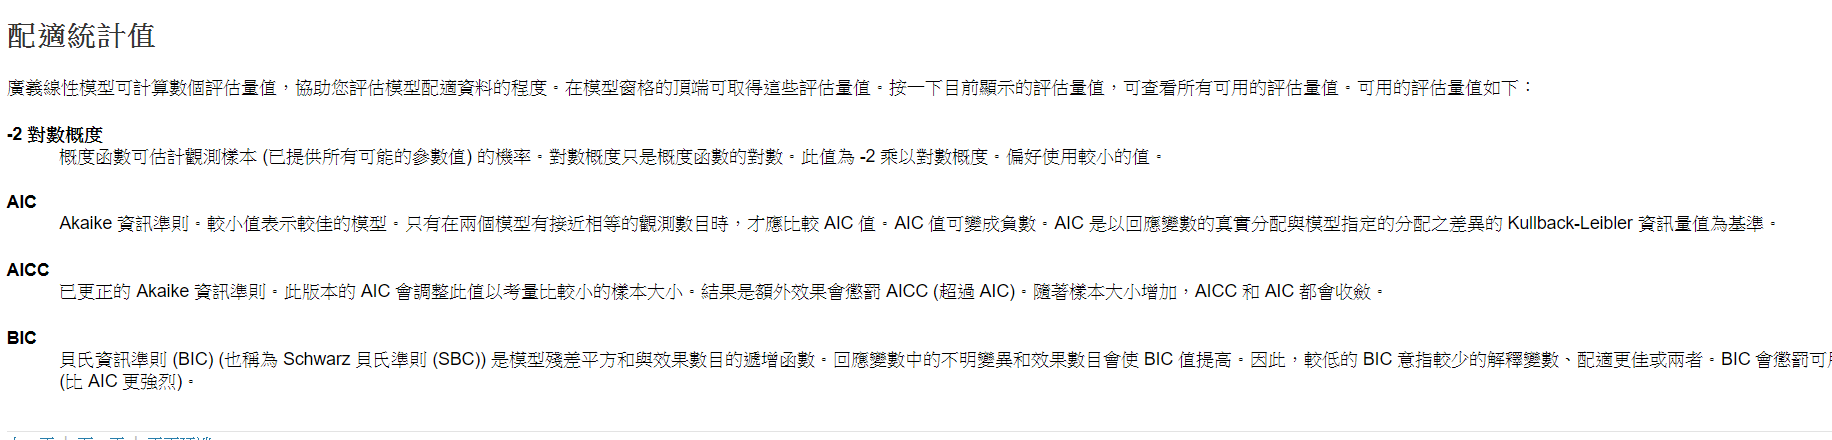

In [ ]:
OneVar<-glm(formula=Rings~.,data=training)
TwoVar<-glm(formula=Rings~Length	+ Height + WholeWeight + VisceraWeight,
            data=training)
ThreeVar<-glm(formula=Rings~Diameter	+ Height	+ ShuckedWeight	+ ShellWeight,
              data=training)
c(OneVar$aic,TwoVar$aic,ThreeVar$aic)

[1] 13032.78 14001.34 13131.25

###因OneVar的AIC數值較小,所以我們選擇第一個model

In [ ]:
LogModel <- glm(formula=Rings~.,data=training)
summary(LogModel)


Call:
glm(formula = Rings ~ ., data = training)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.2218   -1.3573   -0.3867    0.8825   13.7386  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.95206    0.04145 240.085  < 2e-16 ***
Length        -0.24247    0.26209  -0.925    0.355    
Diameter       1.44166    0.26551   5.430 6.11e-08 ***
Height         0.45726    0.07223   6.331 2.82e-10 ***
WholeWeight    4.34128    0.42389  10.241  < 2e-16 ***
ShuckedWeight -4.49873    0.21724 -20.709  < 2e-16 ***
VisceraWeight -0.98221    0.17072  -5.753 9.66e-09 ***
ShellWeight    1.30170    0.18600   6.998 3.20e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.024667)

    Null deviance: 31271  on 2924  degrees of freedom
Residual deviance: 14657  on 2917  degrees of freedom
AIC: 13033

Number of Fisher Scoring iterations: 2


#Regression 迴歸驗證

In [ ]:
library(MASS)

In [ ]:
##根據AIC，做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(LogModel,direction = "backward")
summary(finalModel_B)$coefficients

Start:  AIC=13032.78
Rings ~ Length + Diameter + Height + WholeWeight + ShuckedWeight + 
    VisceraWeight + ShellWeight

                Df Deviance   AIC
- Length         1    14661 13032
<none>                14657 13033
- Diameter       1    14805 13060
- VisceraWeight  1    14823 13064
- Height         1    14858 13071
- ShellWeight    1    14903 13080
- WholeWeight    1    15184 13134
- ShuckedWeight  1    16812 13432

Step:  AIC=13031.64
Rings ~ Diameter + Height + WholeWeight + ShuckedWeight + VisceraWeight + 
    ShellWeight

                Df Deviance   AIC
<none>                14661 13032
- VisceraWeight  1    14833 13064
- Height         1    14861 13069
- ShellWeight    1    14910 13079
- WholeWeight    1    15188 13133
- Diameter       1    15203 13136
- ShuckedWeight  1    16842 13435


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.9522173,0.04145081,240.097041,0.000000e+00
Diameter,1.2214553,0.11765553,10.381623,8.085748e-25
Height,0.4557778,0.07220952,6.311880,3.175570e-10
WholeWeight,4.3421591,0.42388331,10.243761,3.228145e-24
ShuckedWeight,-4.5133555,0.21665935,-20.831575,5.777937e-90
VisceraWeight,-0.9943545,0.17020898,-5.841963,5.728722e-09
ShellWeight,1.3073150,0.18589632,7.032496,2.516697e-12


In [ ]:
finalModel_B


Call:  glm(formula = Rings ~ Diameter + Height + WholeWeight + ShuckedWeight + 
    VisceraWeight + ShellWeight, data = training)

Coefficients:
  (Intercept)       Diameter         Height    WholeWeight  ShuckedWeight  
       9.9522         1.2215         0.4558         4.3422        -4.5134  
VisceraWeight    ShellWeight  
      -0.9944         1.3073  

Degrees of Freedom: 2924 Total (i.e. Null);  2918 Residual
Null Deviance:	    31270 
Residual Deviance: 14660 	AIC: 13030

In [ ]:
##根據AIC，做逐步選擇, 往前學習 direction = "forward"
finalModel_F<-stepAIC(LogModel,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.9520617,0.04145218,240.0853825,0.000000e+00
Length,-0.2424720,0.26209064,-0.9251458,3.549666e-01
Diameter,1.4416577,0.26551195,5.4297281,6.107688e-08
Height,0.4572620,0.07222912,6.3307151,2.815885e-10
WholeWeight,4.3412790,0.42389485,10.2414055,3.305951e-24
ShuckedWeight,-4.4987324,0.21724048,-20.7085360,5.405916e-89
VisceraWeight,-0.9822088,0.17071872,-5.7533748,9.656114e-09
ShellWeight,1.3017000,0.18599996,6.9983884,3.199289e-12


In [ ]:
finalModel_F


Call:  glm(formula = Rings ~ Length + Diameter + Height + WholeWeight + 
    ShuckedWeight + VisceraWeight + ShellWeight, data = training)

Coefficients:
  (Intercept)         Length       Diameter         Height    WholeWeight  
       9.9521        -0.2425         1.4417         0.4573         4.3413  
ShuckedWeight  VisceraWeight    ShellWeight  
      -4.4987        -0.9822         1.3017  

Degrees of Freedom: 2924 Total (i.e. Null);  2917 Residual
Null Deviance:	    31270 
Residual Deviance: 14660 	AIC: 13030

In [ ]:
##根據AIC，做逐步選擇, 雙向學習 direction = "both"
finalModel_Both<-stepAIC(LogModel,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.9522173,0.04145081,240.097041,0.000000e+00
Diameter,1.2214553,0.11765553,10.381623,8.085748e-25
Height,0.4557778,0.07220952,6.311880,3.175570e-10
WholeWeight,4.3421591,0.42388331,10.243761,3.228145e-24
ShuckedWeight,-4.5133555,0.21665935,-20.831575,5.777937e-90
VisceraWeight,-0.9943545,0.17020898,-5.841963,5.728722e-09
ShellWeight,1.3073150,0.18589632,7.032496,2.516697e-12


In [ ]:
finalModel_Both


Call:  glm(formula = Rings ~ Diameter + Height + WholeWeight + ShuckedWeight + 
    VisceraWeight + ShellWeight, data = training)

Coefficients:
  (Intercept)       Diameter         Height    WholeWeight  ShuckedWeight  
       9.9522         1.2215         0.4558         4.3422        -4.5134  
VisceraWeight    ShellWeight  
      -0.9944         1.3073  

Degrees of Freedom: 2924 Total (i.e. Null);  2918 Residual
Null Deviance:	    31270 
Residual Deviance: 14660 	AIC: 13030

###用testing來評估模型好不好，使用predict函數，將測試組資料放入預測模型中，預測測試組的結果

In [ ]:
summary(finalModel_Both)


Call:
glm(formula = Rings ~ Diameter + Height + WholeWeight + ShuckedWeight + 
    VisceraWeight + ShellWeight, data = training)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.1692   -1.3571   -0.3995    0.8933   13.8048  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.95222    0.04145 240.097  < 2e-16 ***
Diameter       1.22146    0.11766  10.382  < 2e-16 ***
Height         0.45578    0.07221   6.312 3.18e-10 ***
WholeWeight    4.34216    0.42388  10.244  < 2e-16 ***
ShuckedWeight -4.51336    0.21666 -20.832  < 2e-16 ***
VisceraWeight -0.99435    0.17021  -5.842 5.73e-09 ***
ShellWeight    1.30732    0.18590   7.032 2.52e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 5.024419)

    Null deviance: 31271  on 2924  degrees of freedom
Residual deviance: 14661  on 2918  degrees of freedom
AIC: 13032

Number of Fisher Scoring iterations: 2

In [ ]:
predictPoint=predict(finalModel_Both , testing)

In [ ]:
head(predictPoint)

13        15        16        18        19        20 
10.234666 10.800789  8.510685  8.117643  8.110588  7.631336

In [ ]:
cor(x=predictPoint,y=testing$Rings) #相關係數

[1] 0.721673

##一般研究者認為，相關係數0.3以下為低相關，0.3~0.7為中等相關，0.7以上為高度相關,故此模型與測試集資料為高度相關

#決策樹

In [ ]:
head(abalone_z)

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1.44883373,-1.43971988,-1.1841103,-1.2301969,-1.1708267,-1.2051826,-1.2129088,7
2,0.04988553,0.12200034,-0.1082345,-0.3095641,-0.4635549,-0.3568008,-0.2072524,9
3,-0.69947410,-0.43215844,-0.3473180,-0.6378518,-0.6482565,-0.6076664,-0.6023317,10
4,-1.61535809,-1.54047602,-1.4231938,-1.2719975,-1.2158759,-1.2872841,-1.3206577,7
5,-0.82436737,-1.08707338,-1.0645685,-0.9732761,-0.9838727,-0.9406335,-0.8537458,8
6,0.04988553,0.07162227,0.2503907,-0.1046392,-0.5514008,-0.3568008,0.6547389,20


In [ ]:
DT<-rpart(Rings~.,data=abalone_z)
DT

n= 4176 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 4176 43384.9600  9.932471  
   2) ShellWeight< -0.5107451 1426  6468.7630  7.551192  
     4) ShellWeight< -1.293721 361   843.6288  5.686981 *
     5) ShellWeight>=-1.293721 1065  3945.2960  8.183099 *
   3) ShellWeight>=-0.5107451 2750 24637.0500 11.167270  
     6) ShellWeight< 0.9761898 2090 14545.4000 10.646890  
      12) ShellWeight< 0.0746906 840  4760.2810  9.954762  
        24) ShuckedWeight>=-0.523245 672  2484.0710  9.553571 *
        25) ShuckedWeight< -0.523245 168  1735.4050 11.559520 *
      13) ShellWeight>=0.0746906 1250  9112.3200 11.112000  
        26) ShuckedWeight>=0.3799906 714  2343.9060 10.267510 *
        27) ShuckedWeight< 0.3799906 536  5580.9090 12.236940 *
     7) ShellWeight>=0.9761898 660  7733.4480 12.815150  
      14) ShuckedWeight>=0.7921905 499  4325.0260 12.148300  
        28) ShellWeight< 2.369742 430  2680.3000 11.700000 *
        29) ShellWeight>=2.369742 69  10

In [ ]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('rpart.plot')

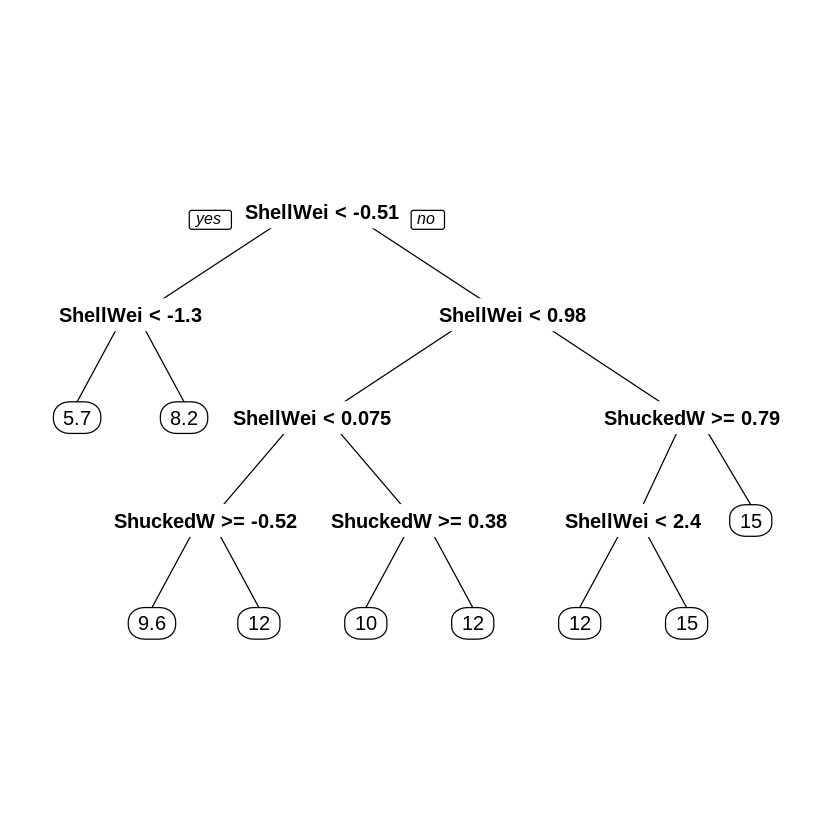

In [ ]:
prp(DT)

#預測一批沒有Rings的鮑魚

In [ ]:
posPred<-predict(DT,testing) #test data
posPred

##核對原本的資料

In [ ]:
result<-cbind(round(posPred,digits = 2),
              testing$WholeWeight,
      as.character(testing$Rings))
head(result)

13,9.55,-0.294271205717832,10
15,9.55,-0.335052281765343,12
16,8.18,-1.09765840385379,7
18,8.18,-1.16902528693694,7
19,8.18,-0.913124034738809,9
20,8.18,-1.18941582496069,11
